### Import wymaganych bibliotek

In [44]:
import tensorflow as tf
import matplotlib.pyplot as pl

### Import danych z zestawu, konwersja do odpowiednich typów


In [45]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:,:,:,None].astype('float32')
x_test = x_test[:,:,:,None].astype('float32')

y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(f"{x_train.shape = }, {y_train.shape = }\n{x_test.shape = }, {y_test.shape = }")

x_train.shape = (60000, 28, 28, 1), y_train.shape = (60000,)
x_test.shape = (10000, 28, 28, 1), y_test.shape = (10000,)


### Wyświetlanie próbek danych treningowych

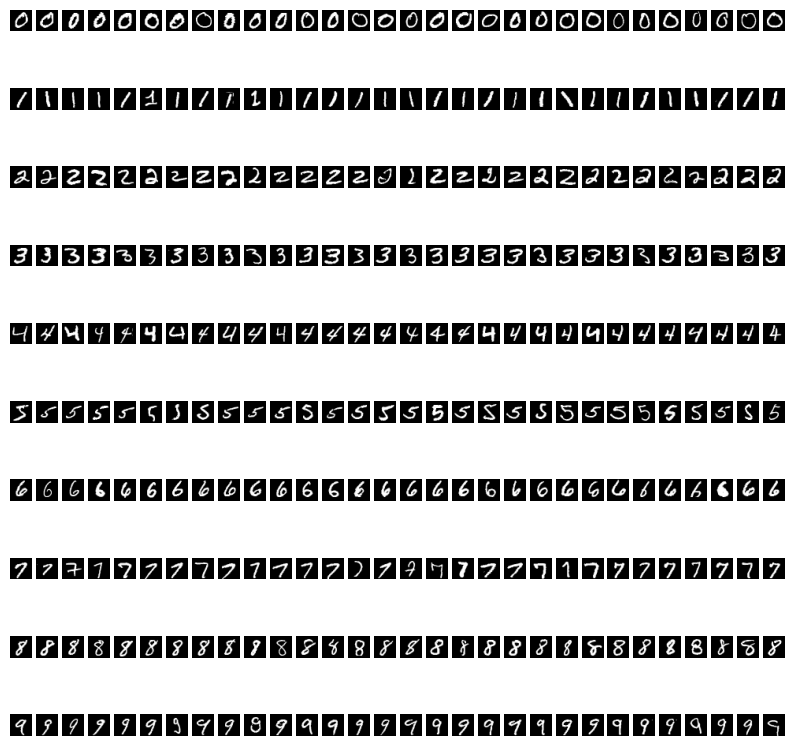

In [39]:
nexamples = 30
f, axs = pl.subplots(10,nexamples,figsize=(10,10))

for i in range(10):
  for j in range(nexamples):
    img = x_train[y_train==i,:,:,0][j,:,:]
    axs[i,j].imshow(img, cmap='gray')
    axs[i,j].axis('off')

pl.show()

### Przykład modelu Konwolucyjnej sieci neuronowej

In [40]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, 3, padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(2, strides=2))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(128, 3, padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(2, strides=2))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

### Trening modelu

In [41]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0,mode='auto', 
                                            baseline=None, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1024, callbacks=[es])

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 56s 923ms/step - accuracy: 0.6802 - loss: 1.0949 - val_accuracy: 0.8822 - val_loss: 0.3994
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 57s 971ms/step - accuracy: 0.9598 - loss: 0.1392 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 58s 975ms/step - accuracy: 0.9735 - loss: 0.0908 - val_accuracy: 0.9815 - val_loss: 0.0605
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 57s 966ms/step - accuracy: 0.9797 - loss: 0.0678 - val_accuracy: 0.9827 - val_loss: 0.0591
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 57s 974ms/step - accuracy: 0.9823 - loss: 0.0590 - val_accuracy: 0.9843 - val_loss: 0.0527
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 58s 983ms/step - accuracy: 0.9862 - loss: 0.0480 - val_accuracy: 0.9849 - val_loss: 0.0499
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 57s 972ms/step - accuracy: 0.9871 - loss: 0.0439 - val_accuracy: 0.9870 - val_loss: 0.0422
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 57s 961ms/step - accuracy: 0.9888 - loss: 0.0381 - val_accu

### Eksport do TensorFlow.js

In [50]:
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model, "./Models/model2")

model.save('./test/m1.keras')